In [ ]:
!nvidia-smi

Tue Jul 15 05:12:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Clone YOLOv5 and install requirements**

In [7]:
# Clone YOLOv5 and install requirements
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17516, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 17516 (delta 6), reused 0 (delta 0), pack-reused 17497 (from 4)
Receiving objects: 100% (17516/17516), 16.61 MiB | 28.97 MiB/s, done.
Resolving deltas: 100% (11994/11994), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s et

In [13]:
!ls /content/drive/MyDrive/Final_Project/Military

military_object_dataset


In [ ]:
!rm -rf /content/military_object_dataset  # remove old copy
!cp -r /content/drive/MyDrive/Final_Project/Military/military_object_dataset /content/

In [ ]:
!ls /content/military_object_dataset/train/images | head

000065.jpg
000066.jpg
000067.jpg
000068.jpg
000069.jpg
000070.jpg
000071.jpg
000072.jpg
000073.jpg
000074.jpg


In [ ]:
classes_present = set()
import os

for folder in ["train", "val", "test"]:
    label_path = f"/content/military_object_dataset/{folder}/labels"
    for file in os.listdir(label_path):
        if file.endswith(".txt"):
            with open(os.path.join(label_path, file)) as f:
                for line in f:
                    class_id = line.strip().split()[0]
                    classes_present.add(class_id)

print("Class IDs present in labels:", sorted(classes_present))

Class IDs present in labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


## **Update military_dataset.yaml for Colab Path**

In [ ]:
### Update military_dataset.yaml for Colab Path
yaml_content = """
train: /content/military_object_dataset/train/images
val: /content/military_object_dataset/val/images
test: /content/military_object_dataset/test/images

nc: 12
names: [
  'camouflage_soldier', 'weapon', 'military_tank', 'military_truck',
  'military_vehicle', 'civilian', 'soldier', 'civilian_vehicle',
  'military_artillery', 'trench', 'military_aircraft', 'military_warship'
]
"""

with open("/content/military_dataset.yaml", "w") as f:
    f.write(yaml_content)


In [ ]:
!rm /content/military_object_dataset/train/labels.cache

## **Training YOLOv5 Model**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 15 \
--data /content/military_dataset.yaml \
--weights yolov5s.pt --name military_12class_detect

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
      10/14      5.05G    0.03708    0.02331    0.01118        137        640:  93% 567/609 [05:05<00:23,  1.81it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/14      5.05G    0.03709    0.02333    0.01118        153        640:  93% 568/609 [05:05<00:19,  2.08it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      10/14      5.05G    0.03708    0.02333    0.01117         87        640:  93% 569/609 [05:06<00:20,  2.00it/s]/content/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(

In [ ]:
###  Watch Training Results

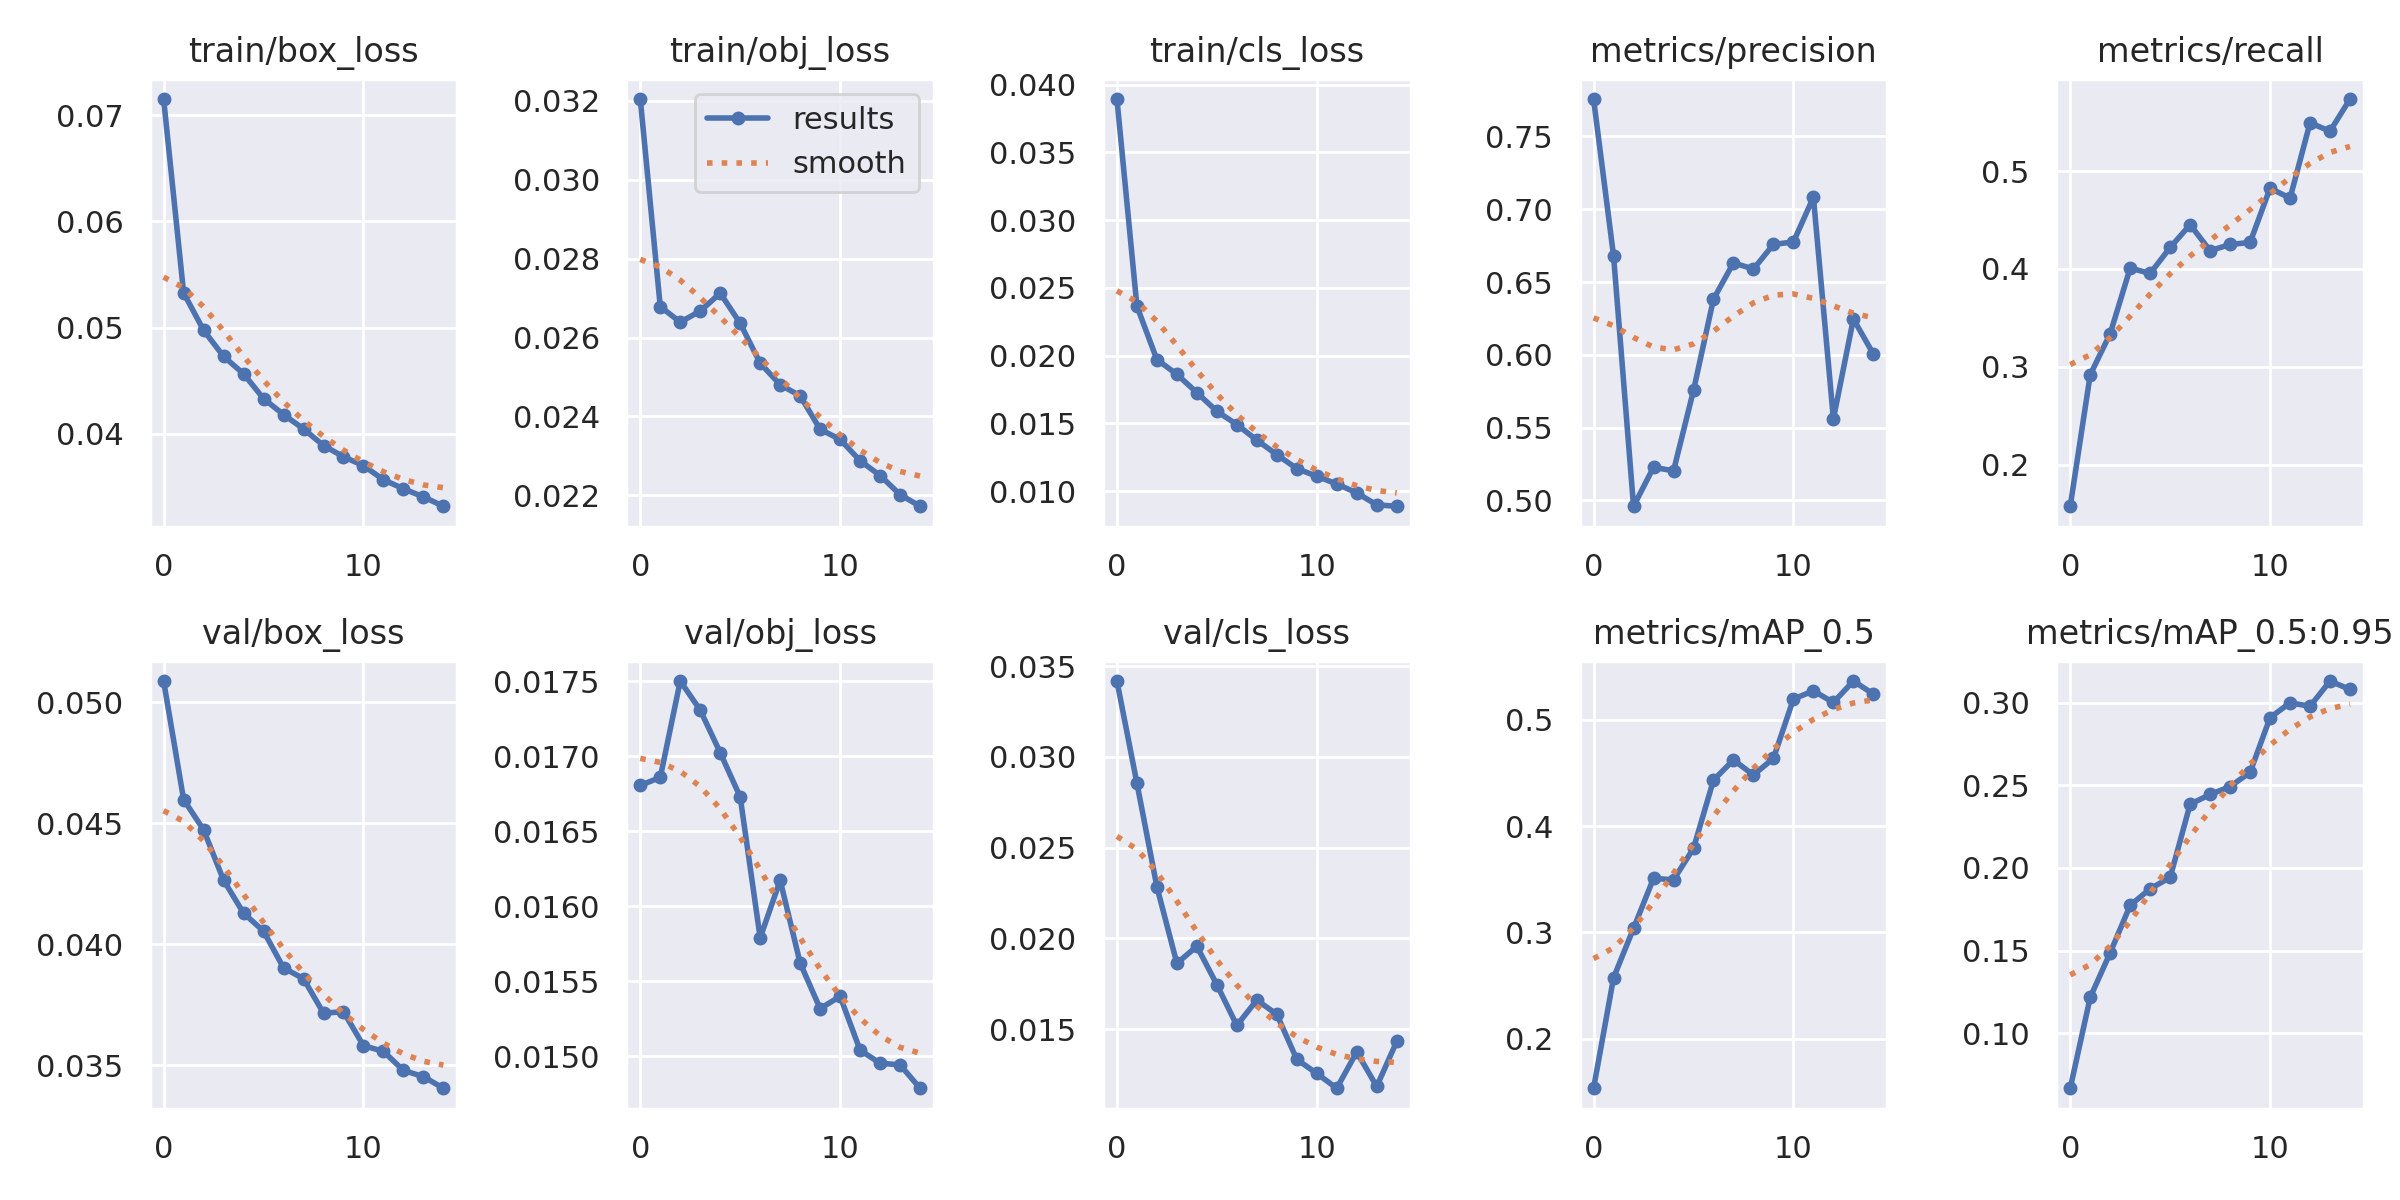

In [ ]:
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/military_12class_detect/results.png', width=800)

In [ ]:
### Find the Best Model Weights Path

In [ ]:
!ls /content/yolov5/runs/train/military_12class_detect/weights

best.pt  last.pt


In [ ]:
### Run Detection on Test Images

!python detect.py --weights /content/yolov5/runs/train/military_12class_detect/weights/best.pt \
--img 640 --conf 0.25 --source /content/military_object_dataset/test/images \
--name detect_12class --save-txt --save-conf

detect: weights=['/content/yolov5/runs/train/military_12class_detect/weights/best.pt'], source=/content/military_object_dataset/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detect_12class, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/742 /content/military_object_dataset/test/images/000001.jpg: 640x640 1 camouflage_soldier, 11.6ms
image 2/742 /content/military_object_dataset/test/images/000002.jpg: 640x640 1 camouflage_soldier, 1 soldier, 11.6ms
image 3/742 /content/

## **Show Some Detection Results (Images)**

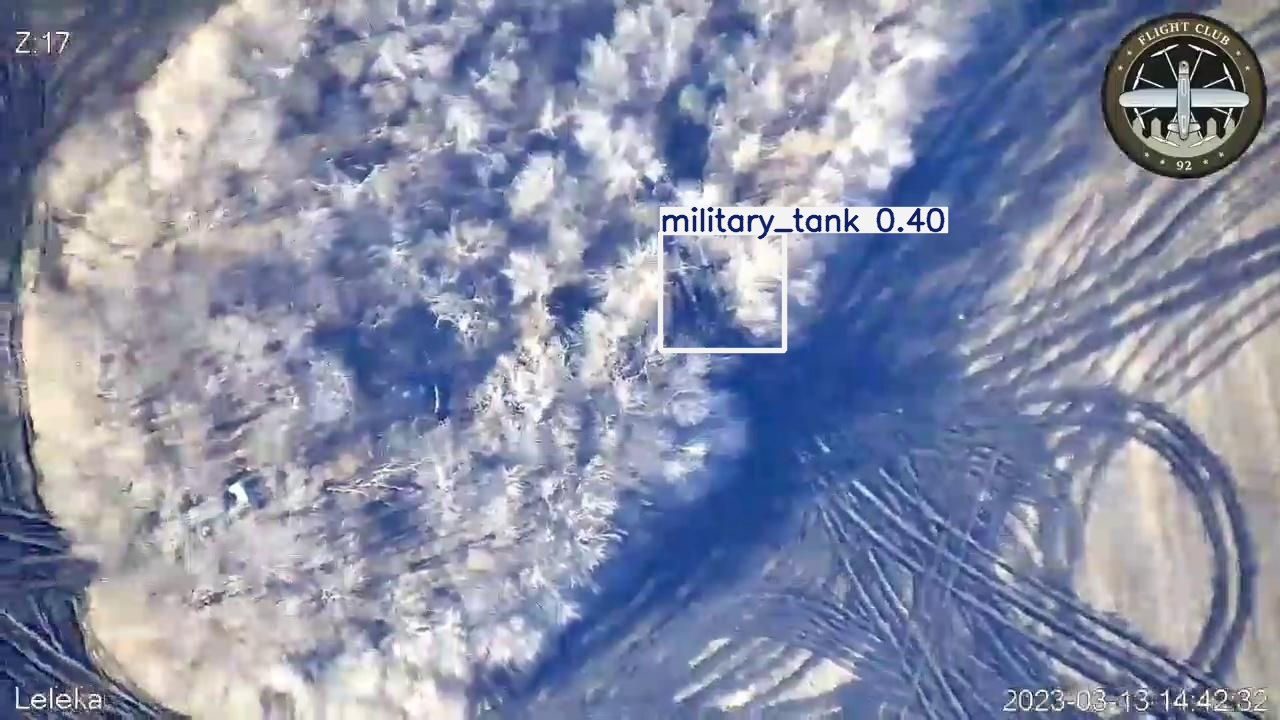

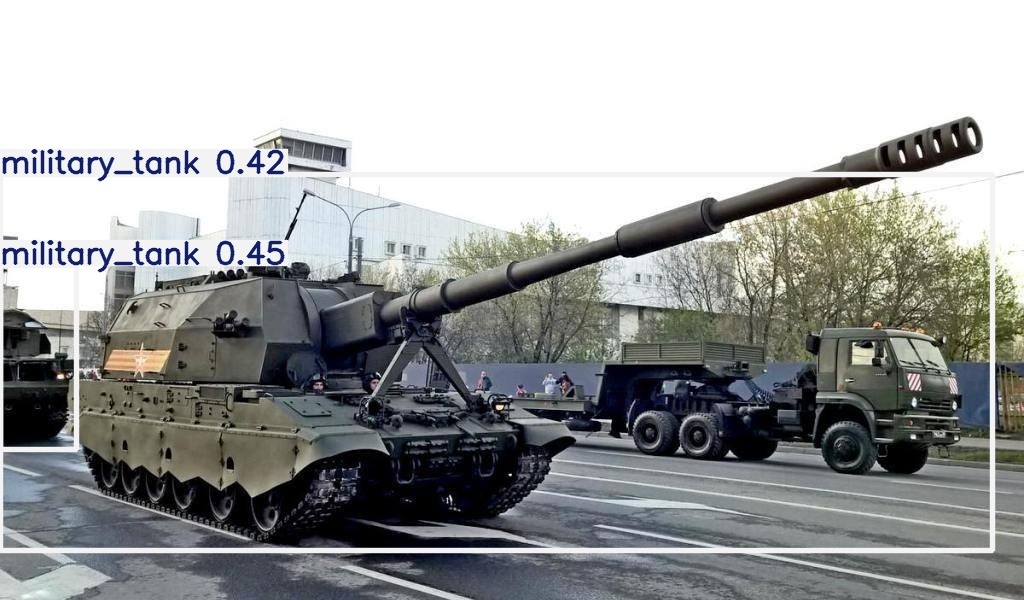

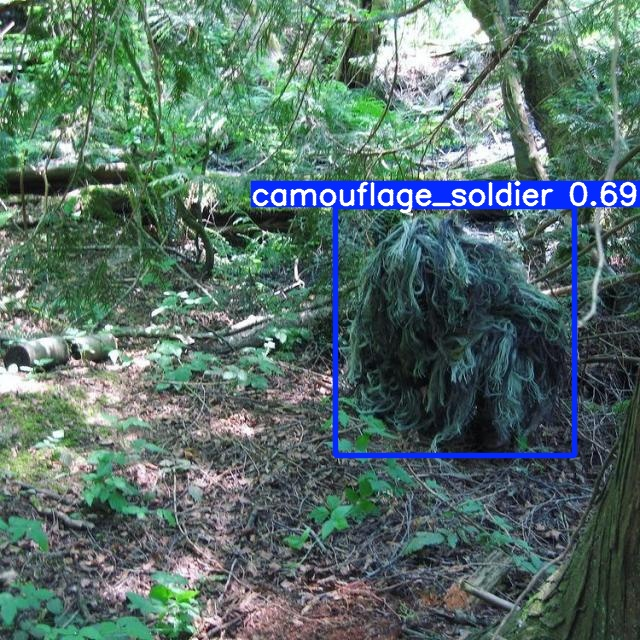

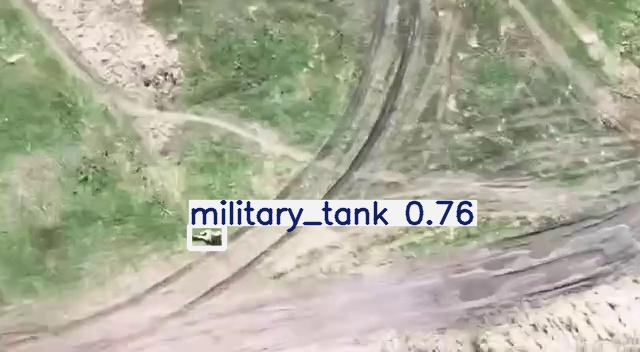

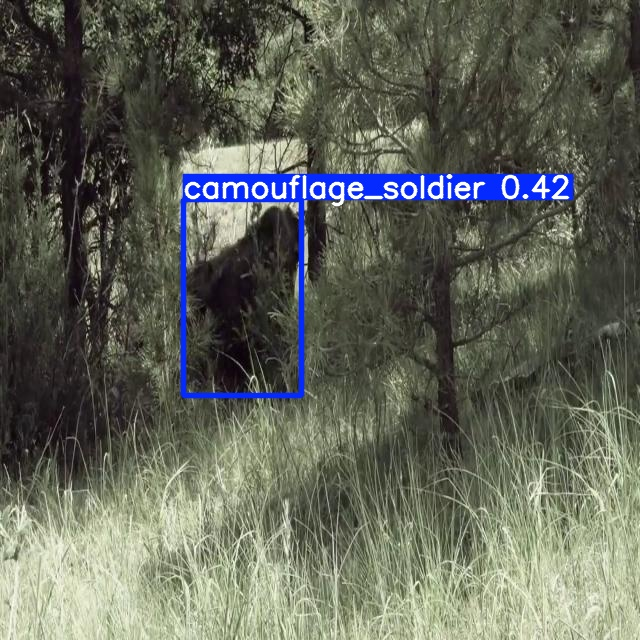

In [ ]:
### Show Some Detection Results (Images)

import os
from IPython.display import Image, display

output_dir = "/content/yolov5/runs/detect/detect_12class"
for file in os.listdir(output_dir)[:5]:  # first 5 images
    if file.endswith((".jpg", ".png")):
        display(Image(filename=os.path.join(output_dir, file)))

In [ ]:
### Save Model

In [ ]:
# Copy best.pt to Drive
!cp /content/yolov5/runs/train/military_12class_detect/weights/best.pt /content/drive/MyDrive/Final_Project/

## **Result**

In [ ]:
# Results :

In [ ]:
from google.colab import files
files.download('/content/yolov5/runs/train/military_12class_detect/results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!ls /content/yolov5/runs/train

military_12class_detect


In [ ]:
!ls /content/yolov5/runs/train/military_12class_detect

confusion_matrix.png				     results.png
events.out.tfevents.1752557565.51792279bdc5.19812.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
hyp.yaml					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
opt.yaml					     val_batch1_labels.jpg
P_curve.png					     val_batch1_pred.jpg
PR_curve.png					     val_batch2_labels.jpg
R_curve.png					     val_batch2_pred.jpg
results.csv					     weights


In [31]:
from google.colab import files
uploaded = files.upload()

Saving results.csv to results.csv


In [32]:
import pandas as pd

df = pd.read_csv("results.csv")
df.head()

,epoch,train/box_loss,train/obj_loss,train/cls_loss,metrics/precision,...,val/obj_loss,val/cls_loss,x/lr0,x/lr1,x/lr2
0,0,0.071529,0.032046,0.038928,0.77573,...,0.016807,0.034177,0.070049,0.003328,0.003328
1,1,0.053270,0.026784,0.023641,0.66791,...,0.016860,0.028554,0.039610,0.006222,0.006222
2,2,0.049757,0.026391,0.019703,0.49602,...,0.017503,0.022843,0.008730,0.008675,0.008675
3,3,0.047291,0.026669,0.018616,0.52278,...,0.017309,0.018628,0.008020,0.008020,0.008020
4,4,0.045654,0.027124,0.017264,0.52033,...,0.017025,0.019567,0.008020,0.008020,0.008020


In [33]:
print(df.columns.tolist())

['               epoch', '      train/box_loss', '      train/obj_loss', '      train/cls_loss', '   metrics/precision', '      metrics/recall', '     metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', '        val/box_loss', '        val/obj_loss', '        val/cls_loss', '               x/lr0', '               x/lr1', '               x/lr2']


In [38]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['epoch', 'train/box_loss', 'train/obj_loss', 'train/cls_loss', 'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/mAP_0.5:0.95', 'val/box_loss', 'val/obj_loss', 'val/cls_loss', 'x/lr0', 'x/lr1', 'x/lr2']


In [45]:
%matplotlib inline

In [46]:
from IPython.display import display
display(plt.gcf())

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

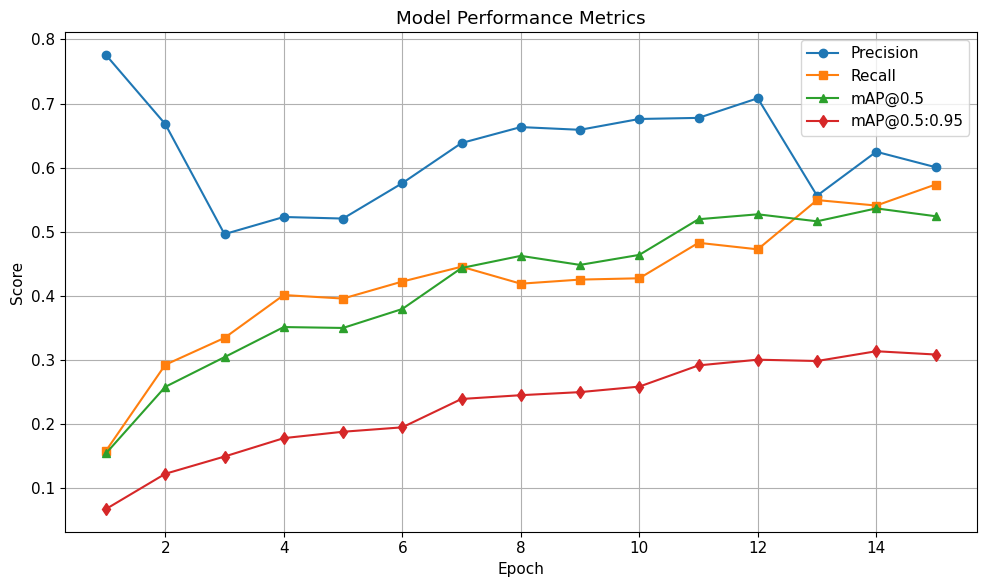

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

# Strip column names
df.columns = df.columns.str.strip()

# Extract metrics
epochs = df.index + 1
precision = df['metrics/precision']
recall = df['metrics/recall']
map50 = df['metrics/mAP_0.5']
map = df['metrics/mAP_0.5:0.95']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, precision, label='Precision', marker='o')
plt.plot(epochs, recall, label='Recall', marker='s')
plt.plot(epochs, map50, label='mAP@0.5', marker='^')
plt.plot(epochs, map, label='mAP@0.5:0.95', marker='d')

plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Model Performance Metrics")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
display(plt.gcf())

📈 What the Graph Shows:
Our plotted 4 model performance metrics over epochs:

🔵 Precision – how accurate our detections are.

🟠 Recall – how well the model finds all relevant objects.

🟢 mAP@0.5 – mean Average Precision with IoU threshold 0.5.

🔴 mAP@0.5:0.95 – mAP over a stricter range of IoU thresholds.